## Team 52


*   Anghelo Daniel Pérez Martínez (A01795323)
*   Luis Daniel Ortega Muñoz (A01795197)
*   Emil Khaleb Palomino Bruzzón (A00826811)
*   José de Jesús Peña Rodríguez (A01794940)
*   Gerardo Miguel Pérez Solis (A01795599)

## TC 5033
# **Word Embeddings**

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


## **Library imports and additional installations**

**Dataset**

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


**AG News (AG’s News Corpus)**

AG News (AG’s News Corpus) is a subdataset of AG's corpus of news articles constructed by assembling titles and description fields of articles from the 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”) of AG’s Corpus. The AG News contains 30,000 training and 1,900 test samples per class.

Papers with Code - AG News Dataset. (s. f.). https://paperswithcode.com/dataset/ag-news

**Pytorch Text Classification**

AG_NEWS

`torchtext.datasets.AG_NEWS(root: str = '.data', split: Union[Tuple[str], str] = ('train', 'test'))`

**Install libraries (if needed)**

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

**Torch text**

This library is part of the PyTorch project. The torchtext package consists of data processing utilities and popular datasets for natural language.

In [ ]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

In [ ]:
!pip install scipy==1.9.3
!pip install scikit-plot
#you may receive a message of restarting session, this is OK

In [ ]:
!pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

### **Import libraries**

In [43]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## **Data Preparation**

Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

**Get the train and the test datasets and dataloaders**

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

**to_map_style_dataset**

Convert iterable-style dataset to map-style dataset.

`torchtext.data.functional.to_map_style_dataset(iter_data)`

https://pytorch.org/text/main/_modules/torchtext/data/functional.html#to_map_style_dataset

**DataLoader**

DataLoader wraps an iterable around the Dataset to enable easy access to the samples

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Load dataset and convert it to "map-style" which makes it compatible with DataLoader


In [3]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

Create a 'basic_english' tokenizer, which will be used to split text into tokens

In [4]:
tokeniser = get_tokenizer('basic_english')

**yield_tokens()**

This function receives a parameter "data" which is an iterable collection of tuples (label, text), then loops through "data" to get the text from each item and tokenize it.

In [5]:
def yield_tokens(data):
    for _, text in data:
        yield tokeniser(text)

**build_vocab_from_iterator()**

Build a Vocab from an iterator.

`torchtext.vocab.build_vocab_from_iterator(iterator: Iterable, min_freq: int = 1, specials: Optional[List[str]] = None, special_first: bool = True, max_tokens: Optional[int] = None)`

https://pytorch.org/text/main/vocab.html#build-vocab-from-iterator

Create a vocabulary from tokenized data, this will map each word to an index

*`specials`* parameter allows special tokens in the vocabulary, if it finds a word that wasn't in the training data it will add it to `"<unk>"`

In [6]:
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])

Once the vocabulary was built, set the default index to the index of `<unk>`, that means that 0 will be the index of all the unknown words

In [7]:
vocab.set_default_index(vocab["<unk>"])

Print an example of the result of tokenizing a sentence and their respective value in the vocabulary

In [8]:
tokens = tokeniser('Welcome to TC5033')
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


Define the size of the training dataset, it's going to be 90% of the train_dataset

In [9]:
NUM_TRAIN = int(len(train_dataset)*0.9)

The size of the validation dataset is 10% of train_dataset

In [10]:
NUM_VAL = len(train_dataset) - NUM_TRAIN

Create a train (90%) and a validation (10%) datasets using random_split()

In [11]:
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

Print the sizes of the train, validation and test datasets

In [12]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


**collate_batch()**

This function will be passed to the DataLoader to process a batch of data as indicated:

It will transform the tuples into tensors

In [13]:
def collate_batch(batch):
    # Get label and text and save them in y and x
    y, x = list(zip(*batch))

    # Create list with indices from tokeniser
    # tokenize every text, then convert each token in an index
    # that index represents the position of the token in the vocab
    x = [vocab(tokeniser(text)) for text in x]
    # Iterates x, if the length of the text is less than max_tokens, it adds zeros
    # at the end until reaching max_tokens length
    # if the length is greater than max_tokens, it truncates the exceeding records
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # convert x and y into tensors type int32
    # Prepare the labels, by subtracting 1 to get them in the range 0-3
    # it returns a tuple with 2 tensors
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.int32) - 1

Define news labels (will be used in the confusion matrix), max number of tokens and batch size for the DataLoader

In [14]:
labels =  ["World", "Sports", "Business", "Sci/Tech"]
max_tokens = 50
BATCH_SIZE = 256

Create the three DataLoaders for the train, validation and test datasets

In [15]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

## **Model Setup**

A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

In [16]:
EMBEDDING_SIZE = 300
NEURONS = 256
LAYERS = 2
NUM_CLASSES = 4

**What is RNN?**

A recurrent neural network (RNN) is a deep learning model that is trained to process and convert a sequential data input into a specific sequential data output. Sequential data is data—such as words, sentences, or time-series data—where sequential components interrelate based on complex semantics and syntax rules. An RNN is a software system that consists of many interconnected components mimicking how humans perform sequential data conversions, such as translating text from one language to another.

What is RNN? - Recurrent Neural Networks Explained - AWS. (s. f.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/recurrent-neural-network/?nc1=h_ls

**LSTM**

A Long Short-Term Memory Network, also known as LSTM, is an advanced recurrent neural network that uses "gates" to capture both long-term and short-term memory. These gates help prevent the issues of gradient exploding and vanishing that occur in standard RNNs. LSTM has a well-constructed structure with gates named as "forget gate," "input gate," and "output gate." It is designed to effectively process and retain information over multiple time steps.

Long Short-Term Memory Network. (2021). Science Direct. Recuperado 10 de noviembre de 2024, de https://www.sciencedirect.com/topics/computer-science/long-short-term-memory-network

## **RNN_Model_1 class**

Define the architecture of the **RNN** model, it inherits from **nn.Module** in PyTorch

This is the architecture:

* Embedding layer: convert words to vectors
* LSTM layer: capture sequential information
* Fully connected layer: Predicts probabilities


Params:

* embed_size: size of each word embedding vectors
* hidden: number of neurons in the hidden layers of LSTM
* layers: number of layers of LSTM
* num_classes: output layers


**forward**

this method defines forward propagation of the network, see more details in the comments of the class

In [17]:
class RNN_Model_1(nn.Module):
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                                            embedding_dim=embed_size)

        self.rnn = nn.LSTM(input_size=embed_size,
                           hidden_size=hidden,
                           num_layers=layers,
                           batch_first=True)

        self.fc = nn.Linear(hidden, num_classes)

    def forward(self, x):
        # apply embedding layer to input tokens (x)
        x = self.embedding_layer(x)

        # pass the output of the embedding_layer to LSTM
        # it returns 2 outputs, we use the output sentence
        x, _ = self.rnn(x)

        # get the output of the last time step for classification
        # syntax: select all the elements (:)
        # syntax: select the last output of the sequence (-1)
        x = x[:, -1, :]

        # pass the RNN output through the fully connected layer for classification
        x = self.fc(x)

        return x

## **Accuracy Function**

*Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.*

## **accuracy()**

This function will evaluate model's performance on a given dataset
It iterates the loader from the parameters to get the model's predictions and compares them with the true labels to calculate the accuracy

it will apply `model(x_batch)` to get the predictions and then compare the prediction to `y_batch` which are the true labels

Accuracy is calculated dividing `correct / total`

In [27]:
def accuracy(model, loader):
    # set the model to evaluation mode
    model.eval()

    # initialize variables
    correct = 0
    total = 0

    # disable autograd to save memory and speed up computations
    with torch.no_grad():
        for x_batch, y_batch in loader:
            # move data to cuda
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # get predictions
            outputs = model(x_batch)

            # get highest score for each sample to get the predicted class
            _, predicted = torch.max(outputs, 1)

            # keep track of correct predictions and total samples
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    # calculate the accuracy
    accuracy = correct / total
    return accuracy

## **Training Function**

Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

## **train()**


Model is set to train mode

`model.train()`

The it iterates the train loader

`for batch_x, batch_y in train_loader:`

applies the model to get the predictions

`predictions = model(batch_x)`

calculates loss

`loss = lossFunc(predictions, batch_y)`

performs the backpropagation and prints the number of epoch and its loss

In [19]:
def train(model, optimizer, epochs=100):
    model.train()

    for epoch in range(epochs):
        total_loss = 0

        # Loop over each batch in the training data
        for batch_x, batch_y in train_loader:
            # move data to cuda for faster processing
            batch_x, batch_y = batch_x.to(device), batch_y.to(device).long()

            # get predictions
            predictions = model(batch_x)

            # calculate loss
            # nn.CrossEntropyLoss()
            loss = lossFunc(predictions, batch_y)

            # clear gradients from previous the batch
            optimizer.zero_grad()
            # calculate gradients
            loss.backward()
            # update weights using the optimizer
            optimizer.step()

            # save accumulated loss
            total_loss += loss.item()

        # calculate average loss for this epoch
        avg_loss = total_loss / len(train_loader)
        # print epoch and loss
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

Define hyperparameters

In [22]:
epochs = 10
lr = 0.001

**Instantiate model**

In [ ]:
model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES).to(device)

**Instantiate an Adam optimizer**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

**Instantiate a loss function**

In [ ]:
lossFunc = nn.CrossEntropyLoss()

## **Train the model**

In [23]:
train(model, optimizer, epochs)

Epoch 1/10, Loss: 0.6429
Epoch 2/10, Loss: 0.2949
Epoch 3/10, Loss: 0.2119
Epoch 4/10, Loss: 0.1532
Epoch 5/10, Loss: 0.1132
Epoch 6/10, Loss: 0.0819
Epoch 7/10, Loss: 0.0616
Epoch 8/10, Loss: 0.0416
Epoch 9/10, Loss: 0.0341
Epoch 10/10, Loss: 0.0275


## **Print the accuracy**

In [28]:
print(f'{accuracy(model, test_loader):.4f}')

0.9061


## **Text Sampling**

*Write a function that takes a sample text as input and classifies it using your trained model.*

## **sample_text()**

This function will receive a sample text and display its category to validate how the model works

it processes the text and applies the model, then gets the category and returns the name of the category

In [29]:
def sample_text(model, text):
    # set model to evaluation mode
    model.eval()

    # tokenize the input text
    tokens = tokeniser(text)

    # convert tokens to indices
    token_indices = vocab(tokens)

    # make token_indices have same length (max_tokens)
    if len(token_indices) < max_tokens:
        # add zeros
        token_indices += [0] * (max_tokens - len(token_indices))
    else:
        # truncate
        token_indices = token_indices[:max_tokens]

    # convert token_indices to tensor of type int32
    input_tensor = torch.tensor([token_indices], dtype=torch.int32).to(device)

    # disable gradiente calculation
    with torch.no_grad():
        # get prediction
        output = model(input_tensor)

    # get the predicted class (highest score in the output vector)
    predicted_class = torch.argmax(output, dim=1).item()

    # map the predicted class index to the corresponding label
    label = labels[predicted_class]

    # return name of the category
    return label


Classify this text:

In [40]:
print(test_dataset[0][1])

Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.


The category of the previos text is:

In [39]:
sample_text(model, test_dataset[0][1])

'Business'

## **Confusion Matrix**

*Implement a function to display the confusion matrix for your model on the test data.*

## **conf_matrix()**


This function will plot a confusion matrix, it will get the predictions and compare them with the true labels.

In [54]:
def conf_matrix(model, loader):
    # initilize lists
    all_preds = []
    all_labels = []

    # set model to evaluation mode
    model.eval()

    #disable gradiente calculation
    with torch.no_grad():
        # loop test loader
        for batch_x, batch_y in loader:
            # move data to cuda for faster processing
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # get the predictions
            outputs = model(batch_x)
            # get the predicted class
            _, preds = torch.max(outputs, 1)

            # this lists will save the category name to display the results
            # in the confusion matrix using labels instead of indices
            # using cpu().numpy() to avoid an error for using cuda as device
            # for computing other heavy processes

            # add prediction to list
            all_preds.extend([labels[pred] for pred in preds.cpu().numpy()])
            # add actual label to list
            all_labels.extend([labels[label] for label in batch_y.cpu().numpy()])

    # calculate confusion matrix using all labels and all predictions
    cm = confusion_matrix(all_labels, all_preds)

    # plot the confusion matrix
    plt.figure(figsize=(8, 6))
    skplt.metrics.plot_confusion_matrix(all_labels, all_preds, cmap="Greens", labels=labels)
    plt.title("Confusion Matrix")
    plt.show()

## **Plot confusion matrix**

<Figure size 800x600 with 0 Axes>

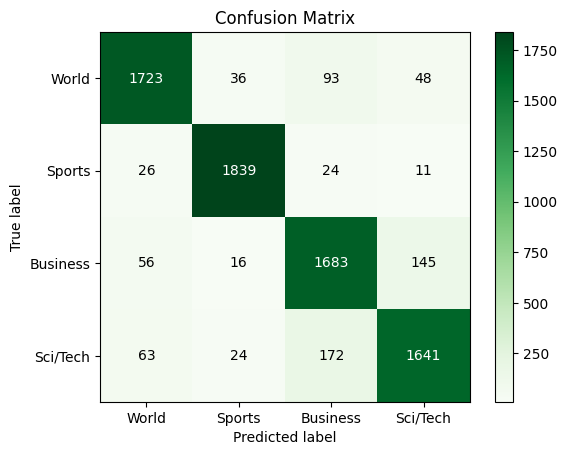

In [55]:
conf_matrix(model, test_loader)